# 1. MLP Basics
Vanilla neural networks (i.e., Multilayer perceptrons)

models: https://keras.io/models/sequential/
layers: https://keras.io/layers/core/
optimizers: https://keras.io/optimizers/
losses: https://keras.io/losses/
metrics: https://keras.io/metrics/
weight initilization: https://keras.io/initializers/
activation functions: https://keras.io/activations/
dropout: https://keras.io/layers/core/#dropout
normalization: https://keras.io/layers/normalization/


#### MLP Structures
- Each MLP model is consisted of one input layer, several hidden layers, and one output layer
- Number of neurons in each layer is not limited
<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" style="width: 300px"/>
<br>
<center>**MLP with one hidden layer**</center>
- Number of input neurons: 3
- Number of hidden neurons: 4
- Number of output neurons: 2


## 1.1. Regression Task (Boston Housing Prices)
- When the target (**y**) is continuous (real)
- For loss function and evaluation metric, mean squared error (MSE) is commonly used

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split

### Dataset
- Boston housing dataset has total 506 data instances (404 training & 102 test)
- 13 attributes (features) to predict "the median values of the houses at a location"
- Doc: https://keras.io/datasets/

In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(X_train, y_train),(X_test, y_test) = boston_housing.load_data()

In [4]:
print (X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


### Model
models: https://keras.io/models/sequential/ 

In [5]:
model = Sequential()

#### - Model Layers
layers: https://keras.io/layers/core/ weight initilization: https://keras.io/initializers/ activation functions: https://keras.io/activations/ dropout: https://keras.io/layers/core/#dropout

In [6]:
# Keras model with two hidden layer with 10 neurons each
model.add(Dense(10, input_shape=(13,)))   # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))

model.add(Dense(10))                      # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))

model.add(Dense(10))                      # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))

model.add(Dense(1))                       # Output layer => output dimension = 1 since it is regression problem

#### - Model Compile (with optimizer)
optimizers: https://keras.io/optimizers/ 
losses: https://keras.io/losses/
metrics: https://keras.io/metrics/

In [7]:
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.0)
model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['mse'])  # for regression problems, mean squared error (MSE) is often employed



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

#### - Model Fit (Train)

In [9]:
model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1)

Train on 404 samples
Epoch 1/100
404/404 [==============================] - 1s 1ms/sample - loss: 365.5055 - mse: 365.5055
Epoch 2/100
404/404 [==============================] - 0s 49us/sample - loss: 102.3870 - mse: 102.3870
Epoch 3/100
404/404 [==============================] - 0s 52us/sample - loss: 83.8280 - mse: 83.8280
Epoch 4/100
404/404 [==============================] - 0s 50us/sample - loss: 84.1185 - mse: 84.1185
Epoch 5/100
404/404 [==============================] - 0s 56us/sample - loss: 84.0177 - mse: 84.0177
Epoch 6/100
404/404 [==============================] - 0s 89us/sample - loss: 82.6715 - mse: 82.6715
Epoch 7/100
404/404 [==============================] - 0s 75us/sample - loss: 82.8856 - mse: 82.8856
Epoch 8/100
404/404 [==============================] - 0s 46us/sample - loss: 81.4509 - mse: 81.4509
Epoch 9/100
404/404 [==============================] - 0s 60us/sample - loss: 80.3800 - mse: 80.3800
Epoch 10/100
404/404 [==============================] - 0s 49us/sam

404/404 [==============================] - 0s 53us/sample - loss: 77.6393 - mse: 77.6393
Epoch 82/100
404/404 [==============================] - 0s 42us/sample - loss: 77.4259 - mse: 77.4259
Epoch 83/100
404/404 [==============================] - 0s 41us/sample - loss: 77.4949 - mse: 77.4949
Epoch 84/100
404/404 [==============================] - 0s 47us/sample - loss: 77.3322 - mse: 77.3322
Epoch 85/100
404/404 [==============================] - 0s 39us/sample - loss: 77.4082 - mse: 77.4082
Epoch 86/100
404/404 [==============================] - 0s 53us/sample - loss: 77.2768 - mse: 77.2768
Epoch 87/100
404/404 [==============================] - 0s 44us/sample - loss: 77.3745 - mse: 77.3745
Epoch 88/100
404/404 [==============================] - 0s 49us/sample - loss: 77.2202 - mse: 77.2203
Epoch 89/100
404/404 [==============================] - 0s 35us/sample - loss: 77.5726 - mse: 77.5726
Epoch 90/100
404/404 [==============================] - 0s 41us/sample - loss: 78.1099 - mse: 7

#### - Model Evaluate
metrics: https://keras.io/metrics/

In [10]:
results = model.evaluate(X_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

['loss', 'mse']
[77.92059565525429, 77.92059]


In [12]:
print('loss: ', results[0])
print('mse: ', results[1])

loss:  77.92059565525429
mse:  77.92059


#### Clear the model (if needed)

In [13]:
tf.keras.backend.clear_session()

## 1.2. Binary Classification Task (Breast Cancer)
- When the target (**y**) is discrete (categorical)
- For loss function, cross-entropy is used and for evaluation metric, accuracy is commonly used

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split

### Dataset
- Breast cancer dataset has total 569 data instances (212 malign, 357 benign instances)
- 30 attributes (features) to predict the binary class (M/B)
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [15]:
from sklearn.datasets import load_breast_cancer

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [16]:
breast_cancer_data = load_breast_cancer()

In [17]:
X_data = breast_cancer_data.data
y_data = breast_cancer_data.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

In [19]:
print (X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(398, 30)
(398,)
(171, 30)
(171,)


### Model

In [23]:
model =Sequential()

In [24]:
model.add(Dense(10, input_shape=(30,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [25]:
sgd=optimizers.SGD(learning_rate=0.01, momentum=0.0)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['acc'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [27]:
model.fit(X_train, y_train, batch_size=30, epochs=100, verbose=1)

Train on 398 samples
Epoch 1/100
398/398 [==============================] - 1s 2ms/sample - loss: 13.5667 - acc: 0.5804
Epoch 2/100
398/398 [==============================] - 0s 139us/sample - loss: 0.6864 - acc: 0.6055
Epoch 3/100
398/398 [==============================] - 0s 99us/sample - loss: 0.6831 - acc: 0.6055
Epoch 4/100
398/398 [==============================] - 0s 98us/sample - loss: 0.6805 - acc: 0.6055
Epoch 5/100
398/398 [==============================] - 0s 116us/sample - loss: 0.6784 - acc: 0.6055
Epoch 6/100
398/398 [==============================] - 0s 147us/sample - loss: 0.6764 - acc: 0.6055
Epoch 7/100
398/398 [==============================] - ETA: 0s - loss: 0.6697 - acc: 0.633 - 0s 124us/sample - loss: 0.6755 - acc: 0.6055
Epoch 8/100
398/398 [==============================] - 0s 163us/sample - loss: 0.6745 - acc: 0.6055
Epoch 9/100
398/398 [==============================] - 0s 151us/sample - loss: 0.6735 - acc: 0.6055
Epoch 10/100
398/398 [======================

398/398 [==============================] - 0s 81us/sample - loss: 0.6708 - acc: 0.6055
Epoch 82/100
398/398 [==============================] - 0s 88us/sample - loss: 0.6708 - acc: 0.6055
Epoch 83/100
398/398 [==============================] - 0s 72us/sample - loss: 0.6708 - acc: 0.6055
Epoch 84/100
398/398 [==============================] - 0s 73us/sample - loss: 0.6709 - acc: 0.6055
Epoch 85/100
398/398 [==============================] - 0s 68us/sample - loss: 0.6708 - acc: 0.6055
Epoch 86/100
398/398 [==============================] - 0s 67us/sample - loss: 0.6709 - acc: 0.6055
Epoch 87/100
398/398 [==============================] - 0s 75us/sample - loss: 0.6709 - acc: 0.6055
Epoch 88/100
398/398 [==============================] - 0s 86us/sample - loss: 0.6708 - acc: 0.6055
Epoch 89/100
398/398 [==============================] - 0s 73us/sample - loss: 0.6709 - acc: 0.6055
Epoch 90/100
398/398 [==============================] - 0s 80us/sample - loss: 0.6708 - acc: 0.6055
Epoch 91/100


In [28]:
results = model.evaluate(X_test, y_test)

171/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [29]:
model.metrics_names

['loss', 'acc']

In [32]:
results

[0.6390235424041748, 0.67836255]

In [96]:
tf.keras.backend.clear_session()

# 2 MLP Advanced

- Weight Initialization
- Nonlinearity (Activation function)
- Optimizers
- Batch Normalization
- Dropout (Regularization)
- Model Ensemble

#### - Weight Initialization
- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

#### - Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>

#### - Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

#### - Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/layers/normalization/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

#### - Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

#### - Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html



## Categorical Classification Task (MNIST)

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

import numpy as np
import matplotlib.pyplot as plt

### Dataset
- MNIST: http://yann.lecun.com/exdb/mnist/

In [98]:
from tensorflow.keras.datasets import mnist

In [99]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [100]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


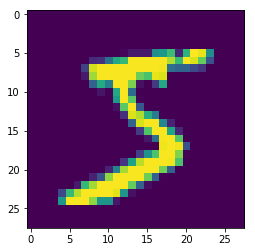

label:  5


In [101]:
plt.imshow(X_train[0])      # show first number in the train set
plt.show()
print('label: ', y_train[0])

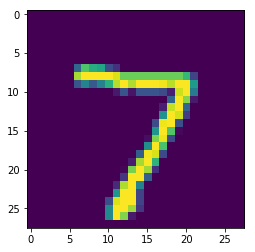

label:  7


In [102]:
plt.imshow(X_test[0])     # show first number in test set
plt.show()
print('label: ', y_test[0])

### Preprocessing

In [103]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [104]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]  #correspoonding to 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


### Model

In [106]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape=(784,), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.2))
    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.2))
    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.2))
    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.2))
    
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam=optimizers.Adam(learning_rate=0.001)
    model.compile(optimizers=adam, loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [107]:
mlp_model = mlp_model()

mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0

In [108]:
results = mlp_model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0, validation_split=0.3)

In [112]:
results.params

{'batch_size': 32,
 'epochs': 100,
 'steps': 1313,
 'samples': 42000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

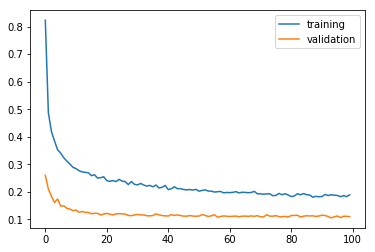

In [123]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['training', 'validation'])
plt.show()

In [130]:
test_results = mlp_model.evaluate(X_test, y_test, verbose=0)

print(mlp_model.metrics_names, test_results)

['loss', 'acc'] [0.0964179709388176, 0.9723]


### Model Ensemble

In [131]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [138]:
## Convert back from one-hot-encoded to categorical numbers for ensemble classifire
y_train = y_train.argmax(axis=1)
y_test = y_test.argmax(axis=1)

In [141]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [90]:
# create 5 models to ensemble
model1 = KerasClassifier(build_fn=mlp_model, batch_size=32, epochs=100)
model2 = KerasClassifier(build_fn=mlp_model, batch_size=32, epochs=100)
model3 = KerasClassifier(build_fn=mlp_model, batch_size=32, epochs=100)
model4 = KerasClassifier(build_fn=mlp_model, batch_size=32, epochs=100)
model5 = KerasClassifier(build_fn=mlp_model, batch_size=32, epochs=100)

In [144]:
ensemble_clf = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], \
                    voting='soft')

ensemble_clf.fit(X_train, y_train)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 105us/sample - loss: 0.7216 - acc: 0.7781
Epoch 2/100
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4300 - acc: 0.8768
Epoch 3/100
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3742 - acc: 0.8950
Epoch 4/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3441 - acc: 0.9031
Epoch 5/100
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3240 - acc: 0.9108
Epoch 6/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3066 - acc: 0.9140
Epoch 7/100
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2982 - acc: 0.9173
Epoch 8/100
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2909 - acc: 0.9205
Epoch 9/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2737 - acc: 0.9255
Epoch 10/100
60000/60000 [=======================

60000/60000 [==============================] - 5s 76us/sample - loss: 0.1922 - acc: 0.9477
Epoch 79/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1923 - acc: 0.9473
Epoch 80/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1857 - acc: 0.9494
Epoch 81/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1941 - acc: 0.9470
Epoch 82/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1935 - acc: 0.9470
Epoch 83/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1874 - acc: 0.9481
Epoch 84/100
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1929 - acc: 0.9478
Epoch 85/100
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1892 - acc: 0.9474
Epoch 86/100
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1924 - acc: 0.94740s - loss: 0.1939
Epoch 87/100
60000/60000 [==============================] - 

60000/60000 [==============================] - 5s 77us/sample - loss: 0.2032 - acc: 0.9446
Epoch 57/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2027 - acc: 0.9449
Epoch 58/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2008 - acc: 0.9454
Epoch 59/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2028 - acc: 0.9442
Epoch 60/100
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1985 - acc: 0.9454
Epoch 61/100
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2032 - acc: 0.9446
Epoch 62/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2007 - acc: 0.9449
Epoch 63/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1989 - acc: 0.9456
Epoch 64/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1999 - acc: 0.9450
Epoch 65/100
60000/60000 [==============================] - 5s 76us/sample - 

60000/60000 [==============================] - 4s 75us/sample - loss: 0.2231 - acc: 0.9396
Epoch 35/100
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2212 - acc: 0.9402
Epoch 36/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2210 - acc: 0.9391
Epoch 37/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2202 - acc: 0.9397
Epoch 38/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2153 - acc: 0.9407
Epoch 39/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2159 - acc: 0.9410
Epoch 40/100
60000/60000 [==============================] - 1815s 30ms/sample - loss: 0.2180 - acc: 0.9404:15 - loss: 0.
Epoch 41/100
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2152 - acc: 0.9410
Epoch 42/100
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2125 - acc: 0.9412
Epoch 43/100
60000/60000 [==============================] 

60000/60000 [==============================] - 5s 90us/sample - loss: 0.2731 - acc: 0.9241
Epoch 12/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2620 - acc: 0.9276
Epoch 13/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2574 - acc: 0.9305
Epoch 14/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2570 - acc: 0.9294
Epoch 15/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2552 - acc: 0.9297
Epoch 16/100
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2520 - acc: 0.9316
Epoch 17/100
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2414 - acc: 0.9330
Epoch 18/100
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2482 - acc: 0.9313
Epoch 19/100
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2466 - acc: 0.9321
Epoch 20/100
60000/60000 [==============================] - 5s 89us/sample

Epoch 89/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1869 - acc: 0.9487
Epoch 90/100
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1890 - acc: 0.9483
Epoch 91/100
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1867 - acc: 0.9499
Epoch 92/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1946 - acc: 0.9471
Epoch 93/100
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1872 - acc: 0.9482
Epoch 94/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1933 - acc: 0.9470
Epoch 95/100
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1889 - acc: 0.9481
Epoch 96/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1899 - acc: 0.9477
Epoch 97/100
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1883 - acc: 0.9492
Epoch 98/100
60000/60000 [==============================] - 6s

60000/60000 [==============================] - 6s 94us/sample - loss: 0.2012 - acc: 0.9461
Epoch 68/100
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1978 - acc: 0.9463
Epoch 69/100
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1962 - acc: 0.9470
Epoch 70/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2017 - acc: 0.9453
Epoch 71/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1968 - acc: 0.9463
Epoch 72/100
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1963 - acc: 0.9460
Epoch 73/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1965 - acc: 0.9466
Epoch 74/100
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1974 - acc: 0.9460
Epoch 75/100
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1940 - acc: 0.9467
Epoch 76/100
60000/60000 [==============================] - 5s 79us/sample

VotingClassifier(estimators=[('model1', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x14ef6ecf8>), ('model2', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x14ef6ea20>), ('model3', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x14ef..., ('model5', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x14ef6eda0>)],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [148]:
y_pred = ensemble_clf.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
test_acc

0.9793